<a href="https://colab.research.google.com/github/penguin-96/EDA/blob/main/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Data Analysis](https://www.youtube.com/redirect?event=video_description&redir_token=QUFFLUhqa2hybWtTbGltMTF0bnVUUXdYU0p4eEpkdmpuZ3xBQ3Jtc0ttWHRjbmtDX3Y0UTQyT3hBQmgxVFVkUUNDajZrQVJMbG1qSTZrX3M5U2IzbEtMOFlkbDluWkd1a0F0d0E5LXhiZ0Y4NGVFc002bE5mUXFWQzFWVy1YNVRhYWJmdm5ZLWxVbENPMEUyRlFNbEk2OFBUSQ&q=https%3A%2F%2Fwww.kaggle.com%2Fsdolezel%2Fblack-friday&v=cGez1q4iOFU)


Cleaning and Preparing Data for further training


#DATA CLEANING

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# import data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

**Problem Statement**: predicting purchase amount for a customer based on other demographic information


In [ ]:
# merging train and test data for combined pre processing
df = pd.concat(
    map(pd.read_csv, ['train.csv', 'test.csv']), ignore_index=True)

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527230 entries, 0 to 527229
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     527230 non-null  int64  
 1   Product_ID                  527230 non-null  object 
 2   Gender                      527230 non-null  object 
 3   Age                         527230 non-null  object 
 4   Occupation                  527230 non-null  int64  
 5   City_Category               527230 non-null  object 
 6   Stay_In_Current_City_Years  527230 non-null  object 
 7   Marital_Status              527230 non-null  int64  
 8   Product_Category_1          527230 non-null  int64  
 9   Product_Category_2          363942 non-null  float64
 10  Product_Category_3          161066 non-null  float64
 11  Purchase                    293631 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 48.3+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.272300e+05,527230.000000,527230.000000,527230.000000,363942.000000,161066.000000,293631.000000
mean,1.002974e+06,8.079265,0.410195,5.286224,9.847272,12.664156,9319.203837
std,1.724725e+03,6.522483,0.491869,3.740505,5.090152,4.126796,4971.374562
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,11.000000
25%,1.001466e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.002983e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8059.000000
75%,1.004425e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12060.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


1.   Product category 2, 3 and Purchase has null values
2.   Age is in range and hence shows object as data type
3.   User ID may not be very useful going forward





In [ ]:
# dropping user Id
df.drop('User_ID', axis= 1, inplace = True)

Fixing Categorical Features
- Gender
- Age
-City Category

In [ ]:
# Gender
df['Gender'] = pd.get_dummies(df['Gender'], drop_first = 1)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
#age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Age'] = df['Age'].map({'0-17': 1, '18-25': 2,'26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
# city_category
df_city = pd.get_dummies(df['City_Category'], drop_first = 1)

In [ ]:
# combining df_city to df and removing city category
df = pd.concat([df, df_city], axis = 1)
df.drop('City_Category', axis = 1, inplace = True)

In [ ]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [ ]:
# no of missing values  
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            163288
Product_Category_3            366164
Purchase                      233599
B                                  0
C                                  0
dtype: int64

No. of Null Values in Each Feature


1. Product_Category_2            245982
2. Product_Category_3            545809
3. Purchase                      233599

We can now either remove the cells with missing value, or replace missing values with some other value that matches the distribution of the feature

- can drop pro_cat_3 since no of missing values are a lot, but if the info is important we can consider option 2
- can use mode replacement in prod_cat 2 and prod_cat 3
- not required for purchase because ,missing data is of test data only



In [ ]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [ ]:
df['Product_Category_2'].value_counts()

8.0     61728
14.0    53492
2.0     47707
16.0    41791
15.0    36572
5.0     25075
4.0     24928
6.0     15938
11.0    13735
17.0    12944
13.0    10211
9.0      5532
12.0     5258
10.0     2927
3.0      2793
18.0     2743
7.0       568
Name: Product_Category_2, dtype: int64

In [ ]:
# trying to replace with mode 
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [ ]:
# replacement with mode in product_category_3
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [ ]:
# no of missing values  
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [ ]:
# fixing Stay_In_Current_City_Years
# need to change all the numbers from object to int

df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
# converting stay in city from object to int
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [ ]:
# converting B, C and Gender from unt8 to int. Will not affect much though
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)
df['Gender'] = df['Gender'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527230 entries, 0 to 527229
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  527230 non-null  object 
 1   Gender                      527230 non-null  int64  
 2   Age                         527230 non-null  int64  
 3   Occupation                  527230 non-null  int64  
 4   Stay_In_Current_City_Years  527230 non-null  int64  
 5   Marital_Status              527230 non-null  int64  
 6   Product_Category_1          527230 non-null  int64  
 7   Product_Category_2          527230 non-null  float64
 8   Product_Category_3          527230 non-null  float64
 9   Purchase                    293631 non-null  float64
 10  B                           527230 non-null  int64  
 11  C                           527230 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 48.3+ MB


# Visualising


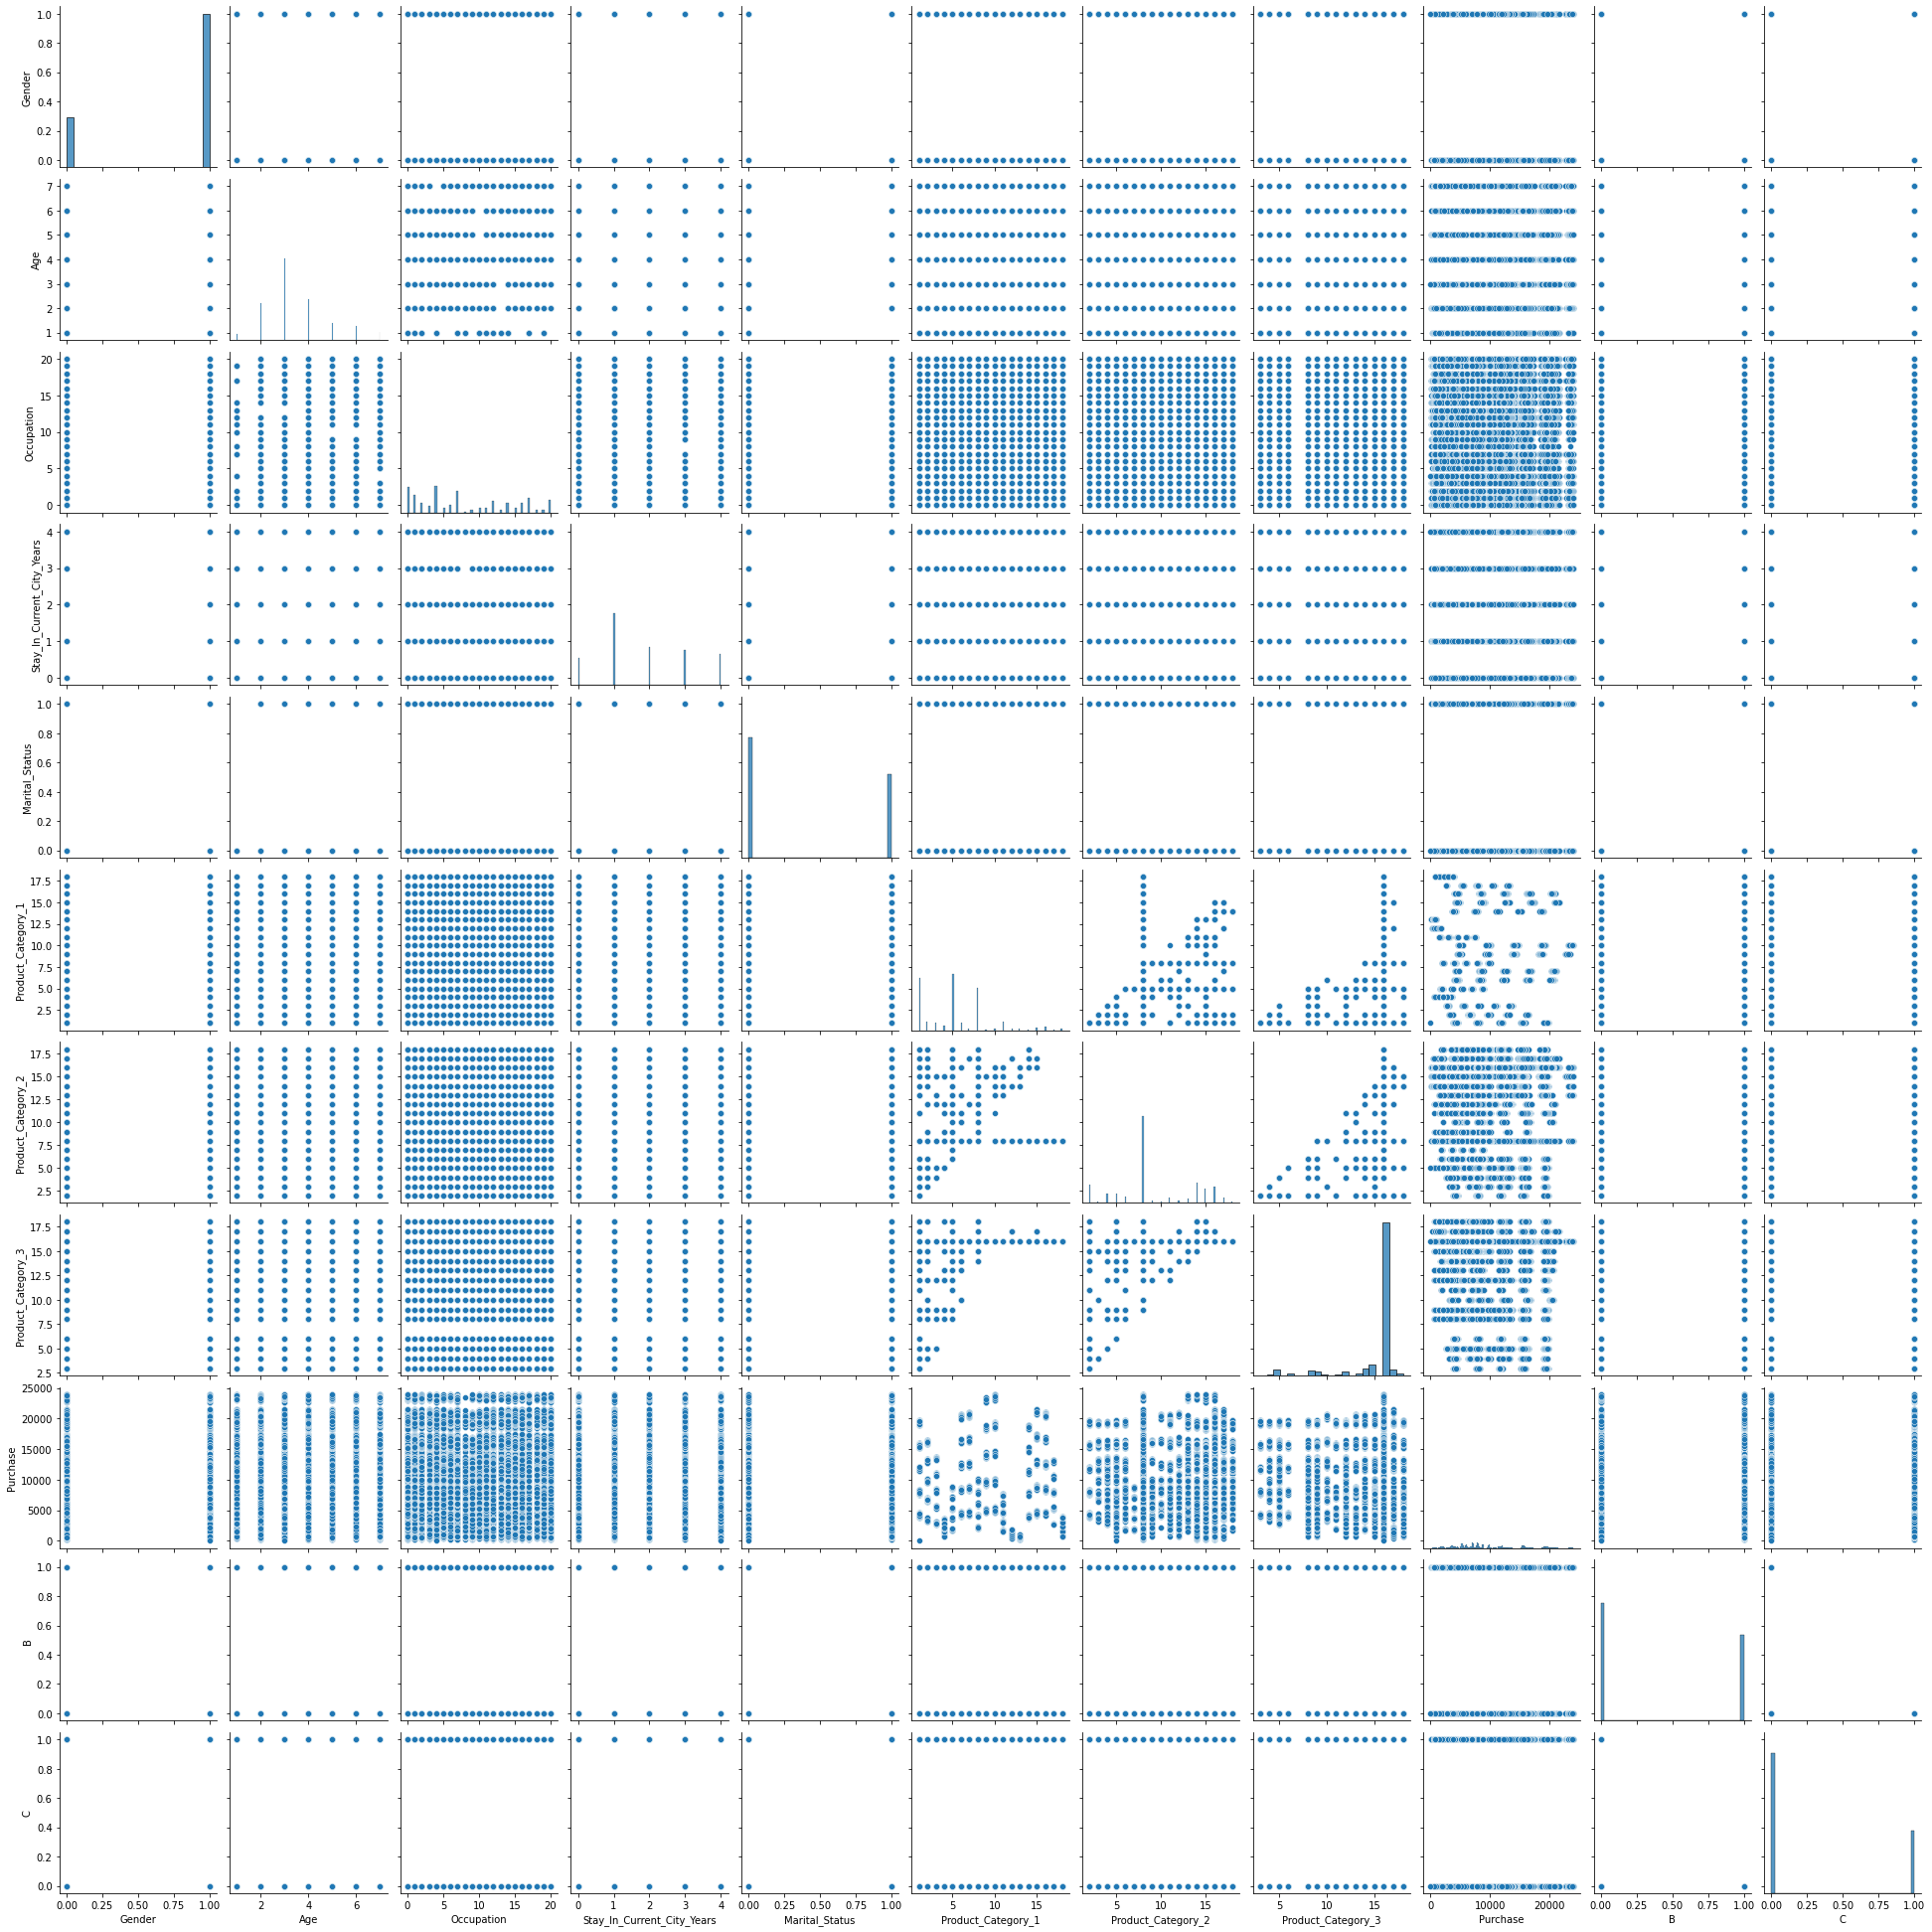

In [ ]:
# pairplot
sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


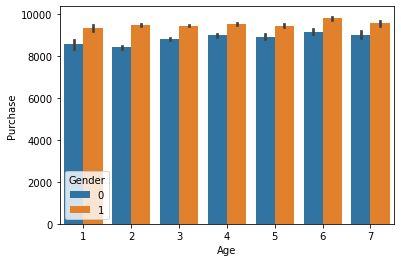

In [ ]:
# barplot wrt to gender
sns.barplot('Age', 'Purchase', hue = 'Gender', data = df)


1. Men on an average are purchasing more than women
2. Distribution is uniform

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


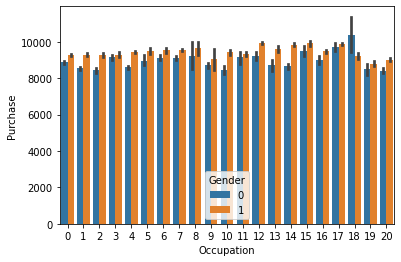

In [ ]:
 # purchases wrt to occupations

 sns.barplot('Occupation', 'Purchase', hue = 'Gender', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


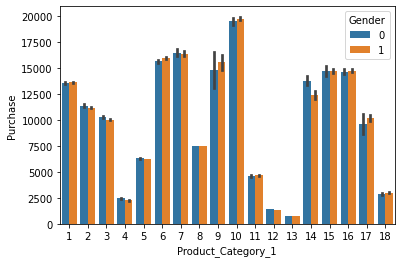

In [ ]:
 sns.barplot('Product_Category_1', 'Purchase', hue = 'Gender', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


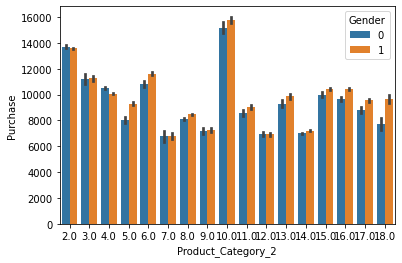

In [ ]:
 sns.barplot('Product_Category_2', 'Purchase', hue = 'Gender', data = df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


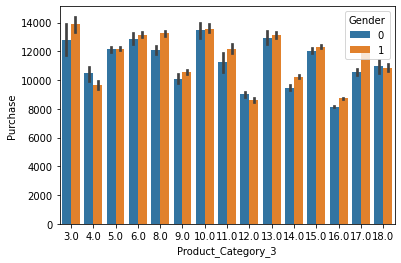

In [ ]:
 sns.barplot('Product_Category_3', 'Purchase', hue = 'Gender', data = df)

# Feature  scaling


In [ ]:
# seperating train and test
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]  # using ~ to denote is not

df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [ ]:
x = df_train.drop('Purchase', axis = 1)
x.drop('Product_ID', axis = 1, inplace = True)
y = df_train['Purchase']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.35, random_state=42)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# convertingg array to database

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test) 